## Importing Tools and Data

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [4]:
df = pd.read_csv('../top-games-google-play-store/data/android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


## Exploraty Data Analysis

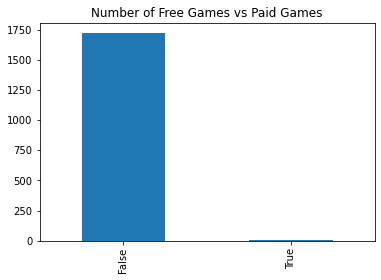

In [60]:
df['paid'].value_counts().plot(kind='bar', title='Number of Free Games vs Paid Games');

There are only 7 paid games, meaning the vast majority of games are free

Let's take a look at the average rating of free vs paid games

In [46]:
rq3free=df[(df['paid']==False)]
rq3paid=df[(df['paid']==True)]

In [47]:
freemean = rq3free['average rating'].mean()
paidmean = rq3paid['average rating'].mean()
print("The Average rating of free games are :",round(freemean,2))
print("The Average rating of paid games are :",round(paidmean,2))

The Average rating of free games are : 4.31
The Average rating of paid games are : 4.57


In [8]:
df.value_counts('category')

category
GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME RACING          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME ACTION          100
GAME PUZZLE          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
dtype: int64

In [20]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [24]:
df.installs.value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
1000.0 M      2
100.0 k       2
Name: installs, dtype: int64

Since the number of installs datatype is an object we must convert this to be an integer to continue our analysis

In [26]:
number_of_downloads = {'100.0 k' : 100000, '500.0 k' : 500000, '1.0 M' : 1000000,
                       '5.0 M' : 5000000, '10.0 M' :10000000, '50.0 M' : 50000000,
                       '100.0 M': 100000000,'500.0 M': 500000000, '1000.0 M': 1000000000,}
df['number_of_downloads'] = df['installs'].map(number_of_downloads)

In [27]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,number_of_downloads
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000


Now that we have the number of downloads in integer format we can start to manipulate that data

In [28]:
rq1=df.groupby(by='category')['number_of_downloads'].sum()

In [29]:
rq1

category
GAME ACTION          6650000000
GAME ADVENTURE       1888000000
GAME ARCADE          6931000000
GAME BOARD           2038000000
GAME CARD            1401000000
GAME CASINO           788500000
GAME CASUAL          6847000000
GAME EDUCATIONAL     1595500000
GAME MUSIC           1285600000
GAME PUZZLE          3631000000
GAME RACING          4640000000
GAME ROLE PLAYING    1449000000
GAME SIMULATION      2871000000
GAME SPORTS          3491000000
GAME STRATEGY        2392000000
GAME TRIVIA           704100000
GAME WORD            1385000000
Name: number_of_downloads, dtype: int64

Now let's sort this list by the number of downloads

In [30]:
rq1 = rq1.reset_index()
rq1 = rq1.sort_values(by= 'number_of_downloads')

In [31]:
rq1

,category,number_of_downloads
15,GAME TRIVIA,704100000
5,GAME CASINO,788500000
8,GAME MUSIC,1285600000
16,GAME WORD,1385000000
4,GAME CARD,1401000000
11,GAME ROLE PLAYING,1449000000
7,GAME EDUCATIONAL,1595500000
1,GAME ADVENTURE,1888000000
3,GAME BOARD,2038000000
14,GAME STRATEGY,2392000000


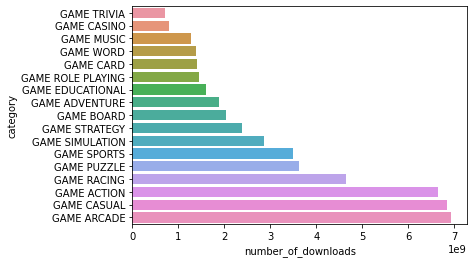

In [57]:
sns.barplot(y='category', x='number_of_downloads', data=rq1);

From the graph above we can clearly see that Action, Casual, and Arcade games are the three most downloaded types of games, while Trivia and Casino types are the least downloaded.

Let us sort the dataset on the basis of its average ratings and the number of downloads

In [35]:
rq2 = df.sort_values(by= ['number_of_downloads', 'average rating'], ascending = False).head(200)

After the above step we group our data according to each category, and get the count of reviews and again sort them by the number of downloads

In [36]:
rq2=rq2.groupby(by='category')['number_of_downloads'].count().reset_index().sort_values(by='number_of_downloads', ascending=False)

Now let's plot this information..

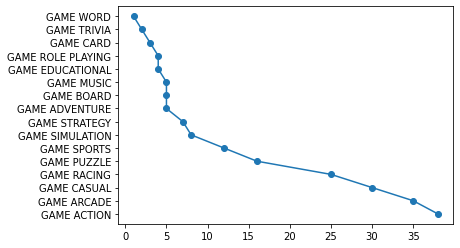

In [42]:
rq2 = df.sort_values(by = ['number_of_downloads','average rating'], ascending=False).head(200)
rq2=rq2.groupby(by = 'category')['number_of_downloads'].count().reset_index().sort_values(by = 'number_of_downloads', ascending=False)
plt.scatter(rq2['number_of_downloads'], rq2['category'])
plt.plot(rq2['number_of_downloads'], rq2['category']);

As we can see our result is not the same as it was before, now the most downloaded game belongs to the action category.

Let's explore which games had the most growth over the first 30 days, then over the first 60 days

In [48]:
rq430days = df.groupby(by = 'category')['growth (30 days)'].mean()
rq460days = df.groupby(by = 'category')['growth (60 days)'].mean()

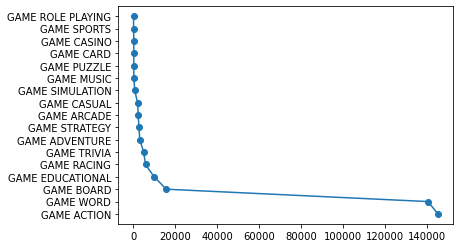

In [54]:
rq4 = df.sort_values(by = 'growth (30 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (30 days)'].sum().reset_index().sort_values(by = 'growth (30 days)', ascending=False)
plt.scatter(rq4['growth (30 days)'], rq4['category'])
plt.plot(rq4['growth (30 days)'], rq4['category']);

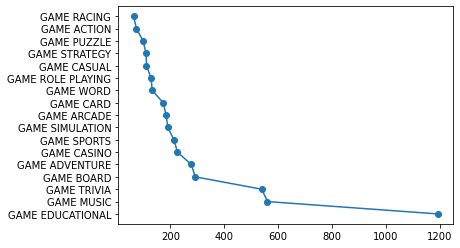

In [55]:
rq4 = df.sort_values(by = 'growth (60 days)', ascending=False).head(200)
rq4=rq4.groupby(by = 'category')['growth (60 days)'].sum().reset_index().sort_values(by = 'growth (60 days)', ascending=False)
plt.scatter(rq4['growth (60 days)'], rq4['category'])
plt.plot(rq4['growth (60 days)'], rq4['category']);

From the two graphs above we can see that Word and Action games had very high growth from the first 30 days, but were towards the middle or bottom of the rankings for growth during the first 60 day period. Educational games rank towards the top for the first 30 days and then show the most growth during the first 60 day period.

Now let's find out which of the game types have the most negative reviews

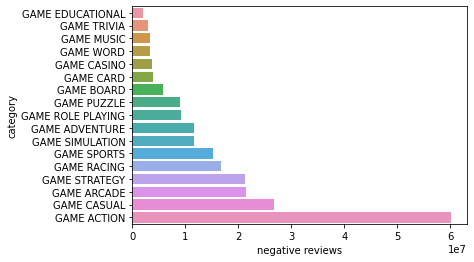

In [56]:
df['negative reviews'] = df['1 star ratings'] + df['2 star ratings']
rq5 = df.groupby(by='category')['negative reviews'].sum()
rq5 = rq5.reset_index()
rq5 = rq5.sort_values(by='negative reviews')
sns.barplot(y='category', x='negative reviews', data=rq5);

From this information we find that action games have the most amount of negative reviews, with casual, arcade, and strategy games right behind it. If we recall the top 3 most downloaded game types were arcade, casual, and action. This could mean that the games that typically have more downloads have a better chance to have negative reviews as compared to other game types.

Let's see if there is a correlation to the average rating of a game and the first 30 days of growth.

In [62]:
columnA=df['average rating']
columnB=df['growth (30 days)']
correlation = columnA.corr(columnB)
print(correlation)

-0.0029918367148512553


With a negative number we can determine there is a negative correlation to the number of downloads within the first 30 days. This means that the average rating goes down within the first 30 days. Let's see if this correlation changes for the first 60 days.

In [63]:
columnA=df['average rating']
columnB=df['growth (60 days)']
correlation = columnA.corr(columnB)
print(correlation)

0.0388397233095088


After 60 days we see there is a positive correlation between the average rating and the number of game downloads. This means the average rating goes up within the first 60 days for a game.